# OptimizerMethod-Optimizer(Keras)

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
import keras.backend as K
from keras.models import Sequential,Model
from keras.layers import Dense,Input

Using TensorFlow backend.


### Load Data Set

In [2]:
def load_dataset(n_sample):
    """
    Load data set.
    Argument:
    --------
        n_sample: number of sample.
    Returns:
    -------
        X: training data.
        y: training labels,the shape os (n_sample,1)
    """
    np.random.seed(3)
    X, y = datasets.make_moons(n_samples=n_sample, noise=.15) #300 #0.2 
    # Visualize the data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=plt.cm.Spectral);
    
    
    return X,y.reshape(-1,1)

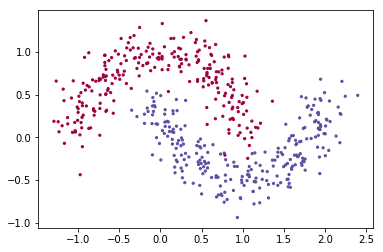

In [3]:
X,y = load_dataset(500)

我们按照7:3拆分training/validation set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
def plot_plot(model_list,title,method):
    
    figure = plt.figure(figsize=(10,5))
    for model,name in model_list:
        plt.plot(model.history.history[method], label=name)
        
    plt.title(title)
    plt.xlabel('Iterate')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

### Model of Sequential

In [32]:
def Optimizer_Model(data,labels,val_data,val_labels,lr=None,mode=None,print_model_summary=True):
    
    model = Sequential()
    initial = keras.initializers.glorot_normal(seed=5)
    model.add(Dense(5,input_shape=(2,),activation='relu',kernel_initializer=initial))
    model.add(Dense(2,activation='relu',kernel_initializer=initial))
    model.add(Dense(1,activation='sigmoid',kernel_initializer=initial))
    
    if mode == "SGD":
        optimizer = keras.optimizers.SGD(lr=lr)
    elif mode == "Momentum":
        optimizer = keras.optimizers.SGD(lr=lr,momentum=0.9)
    elif mode == "NAG":
        optimizer = keras.optimizers.SGD(lr=lr,momentum=0.9,nesterov=True)
    elif mode == "Adagrad":
        optimizer = keras.optimizers.Adagrad(lr=lr,epsilon=1e-7)
    elif mode == "Adadelta":
        optimizer = keras.optimizers.Adadelta(lr=1,rho=0.9,epsilon=1e-6)
    elif mode == "RMSProp":
        optimizer = keras.optimizers.RMSprop(lr=lr,rho=0.9,epsilon=1e-6)
    elif mode == "Adam":
        optimizer = keras.optimizers.Adam(lr=lr,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
    
    loss = keras.losses.binary_crossentropy
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    
    model.fit(x=data,y=labels,batch_size=64,epochs=4000,validation_data=(val_data,val_labels),verbose=0)
    
    if print_model_summary:
        print(model.summary())
    
    loss = model.history.history['loss'][-1]
    acc_train = model.history.history['acc'][-1]
    val_loss = model.history.history['val_loss'][-1]
    acc_val = model.history.history['val_acc'][-1]
    print('Finally train loss:{},acc train:{},val loss:{},acc val:{}'.format(loss,acc_train,val_loss,acc_val))
        
    return model    

### SGD

In [33]:
model_SGD = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.0007,mode="SGD")
K.clear_session()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None
Finally train loss:0.29717084186417714,acc train:0.8857142836706979,val loss:0.3436841821670532,acc val:0.8266666706403096


和之前一样,SGD的正确率在当前的情况下为训练样本的正确率为88%,验证样本的正确率为82%左右

### Momentum

In [34]:
model_Momentum = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.0007,mode="Momentum",print_model_summary=False)
K.clear_session()

Finally train loss:0.04843418532184192,acc train:0.9942857142857143,val loss:0.05271385947863261,acc val:0.9866666642824808


使用了Momentum后,整体效果有明显的好转且在当前情况下,Momentum的效果是最好的.

### NAG

In [35]:
model_NAG = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.0007,mode="NAG",print_model_summary=False)
K.clear_session()

Finally train loss:0.048427218071052006,acc train:0.9942857119015285,val loss:0.05288252075513204,acc val:0.9866666642824808


使用NAG的效果在此情况下和Momentum差不多.

### Adagrad

In [36]:
model_Adagrad = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.01,mode="Adagrad",print_model_summary=False)
K.clear_session()

Finally train loss:0.1466144552401134,acc train:0.9657142860548836,val loss:0.22283858100573223,acc val:0.9133333309491476


自适应学习率的Adagrad的效果也是可以让人接受的.

### Adadelta

In [37]:
model_Adadelta = Optimizer_Model(X_train,y_train,X_test,y_test,mode="Adadelta",print_model_summary=False)
K.clear_session()

Finally train loss:0.00882773152419499,acc train:0.9971428571428571,val loss:0.06960958915452163,acc val:0.9866666642824808


Adadelta的效果也是令人满意的,基本解决了Adagrad累积梯度所造成的学习率过早下降的问题.

### RMSProp

In [38]:
model_RMSProp = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.001,mode="RMSProp",print_model_summary=False)
K.clear_session()

Finally train loss:0.023238154990332466,acc train:0.9942857142857143,val loss:0.09467551499605178,acc val:0.9733333309491475


RMSProp的效果在当前情况下也是可以的,虽然没有Adadelta好,但是这只是针对当下的情况而言.

### Adam

In [39]:
model_Adam = Optimizer_Model(X_train,y_train,X_test,y_test,lr=0.001,mode="Adam",print_model_summary=False)
K.clear_session()

Finally train loss:0.008922082940781756,acc train:0.9942857142857143,val loss:0.11453336437543234,acc val:0.9799999976158142


大BossAdam的效果相比于RMSProp要好一些,整体看到使用Keras框架下Momentum的效果是最好的.

---------

### Plot Loss and Accuracy

### 1.1 Plot Train/Validation Loss

In [40]:
model_list = [[model_SGD,'SGD'],
              [model_Momentum,'Momentum'],
              [model_NAG,'NAG'],
              [model_Adagrad,'Adagrad'],
              [model_Adadelta,'Adadelta'],
              [model_RMSProp,'RMSProp'],
              [model_Adam,'Adam']]

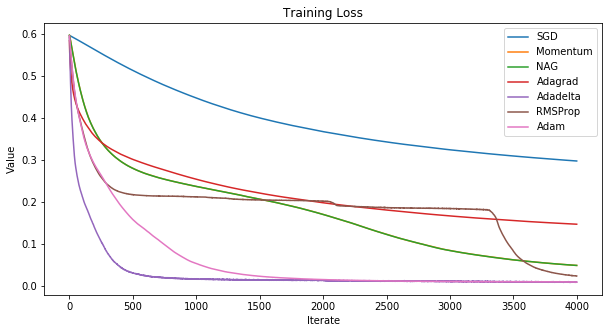

In [41]:
plot_plot(model_list,title='Training Loss',method='loss')

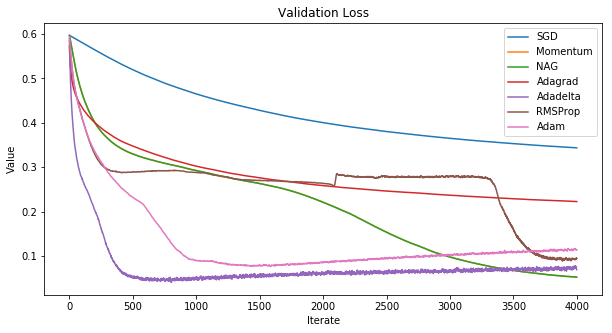

In [43]:
plot_plot(model_list,title='Validation Loss',method='val_loss')

无论是训练样本还是验证样本,其他Optimizer都要比SGD要好一些,但是在这里可以看出Adam,Adadelta,有轻微过拟合发生,对于Momentum/NAG有些许low Learning rate.对于RMSProp而言,发生了loss骤掉的问题,可能在大约3400epoch的时候,RMSProp才走出马鞍点.

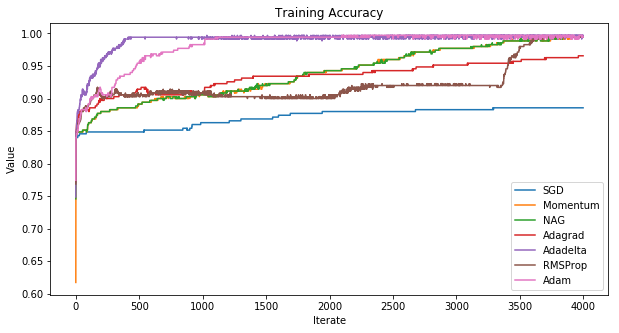

In [42]:
plot_plot(model_list,title='Training Accuracy',method='acc')

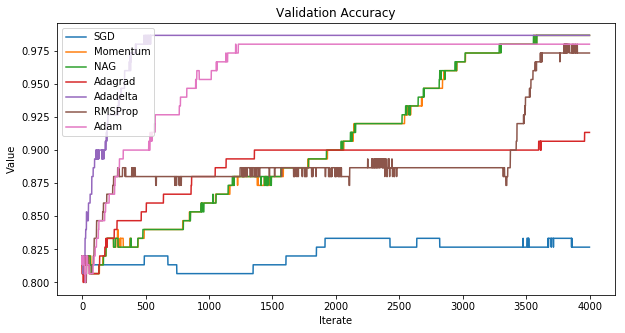

In [44]:
plot_plot(model_list,title='Validation Accuracy',method='val_acc')

可以看出在当前情况下,收敛最快的还是Adadelta,Momentum/NAG收敛速度慢一些.

# Summary

还是那句话,不同情况使用不同的Optimizer,并非哪一个Optimizer就是一定好的.

实际上在写代码的过程中,发现Keras训练受初始值的影响还是很大的,之前设置```keras.initializers.glorot_normal(seed=4)```的时候效果就不是很好,当然这里的效果是指总体7个Optimizer的训练正确率和验证正确率.原因不明,等原因明确的时候,再来填补.